In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import codecs
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
#from scipy import stats
from nltk import word_tokenize

In [5]:
kaggle_data = codecs.open("data/kaggle_trainset.txt", 'r', 'utf-8').read().split('\n')
kaggle_data = kaggle_data[:20800]
kaggle_data = [s.lower() for s in kaggle_data]

kaggle_labels = codecs.open("data/kaggle_train_labels.txt", 'r', 'utf-8').read().split('\n')
kaggle_labels = kaggle_labels[:20800]
kaggle_labels = np.array([int(i) for i in kaggle_labels])

In [27]:
kaggle_train, kaggle_dev, kaggle_train_lab, kaggle_dev_lab = train_test_split(kaggle_data, kaggle_labels, test_size=0.33, random_state=42)

kaggle_train = [word_tokenize(i.lower()) for i in kaggle_train if len(i)>100]
kaggle_dev = [word_tokenize(i.lower()) for i in kaggle_dev if len(i)>100]

In [28]:
liar_train = codecs.open("data/liar_xtrain.txt", 'r', 'utf-8').read().split('\n')
liar_train = [s.lower() for s in liar_train if len(s) > 1]
liar_train_labels = codecs.open('data/liar_ytrain.txt', 'r', 'utf-8').read().split('\n')
liar_train_labels = [s for s in liar_train_labels if len(s) > 1]

liar_dev = codecs.open("data/liar_xval.txt", 'r', 'utf-8').read().split('\n')
liar_dev = [s.lower() for s in liar_dev if len(s) > 1]
liar_dev_labels = codecs.open("data/liar_yval.txt", 'r', 'utf-8').read().split('\n')
liar_dev_labels = [s for s in liar_dev_labels if len(s) > 1]

liar_train = [word_tokenize(i.lower()) for i in liar_train]
liar_dev = [word_tokenize(i.lower()) for i in liar_dev]

In [29]:
kaggle_token_distribution = [len(paragraph) for paragraph in kaggle_train]
liar_token_distribution = [len(paragraph) for paragraph in liar_train]

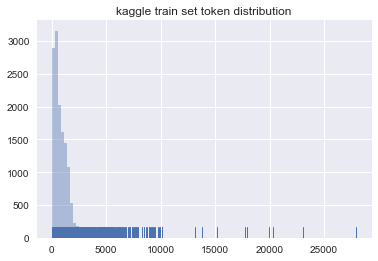

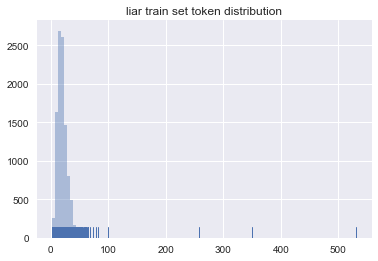

In [30]:
for d,name in zip([kaggle_token_distribution, liar_token_distribution], ["kaggle", "liar"]):
    ax = sns.distplot(d, bins=100, kde=False, rug=True)
    plt.title("{} train set token distribution".format(name))
    plt.show()

In [31]:
print("mean",np.mean(kaggle_token_distribution))
print("median",np.median(kaggle_token_distribution))
print("max", max(kaggle_token_distribution))
print("min", min(kaggle_token_distribution))

mean 897.8096495087257
median 665.0
max 27969
min 9


969
828


(array([ 828., 1007., 1203., 1222., 1183.,  866.,  758.,  726.,  584.,
         596.]),
 array([   0.,  100.,  200.,  300.,  400.,  500.,  600.,  700.,  800.,
         900., 1000.]),
 <a list of 10 Patch objects>)

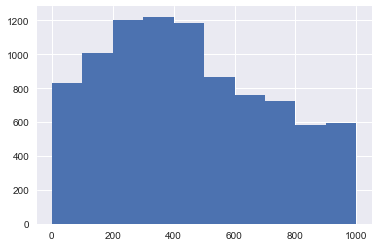

In [44]:
count = 0
for i in kaggle_token_distribution:
    if i > 320 and i < 400:
        count+=1
print(count)

count = 0
for i in kaggle_token_distribution:
    if i < 100:
        count+=1
print(count)
plt.hist(kaggle_token_distribution,bins=10, range=[0, 1000])

(array([593., 515., 536., 504., 463., 382., 310., 230., 172., 123.,  86.,
         90.,  61.,  69.,  51.,  40.,  34.,  19.,  23.,  28.,  26.,  22.,
         15.,  19.,  12.,  14.,  13.,  12.,   7.,  10.,   1.,   8.,   9.,
         12.,   1.,   9.,   7.,  10.,  14.,  14.]),
 array([1000., 1100., 1200., 1300., 1400., 1500., 1600., 1700., 1800.,
        1900., 2000., 2100., 2200., 2300., 2400., 2500., 2600., 2700.,
        2800., 2900., 3000., 3100., 3200., 3300., 3400., 3500., 3600.,
        3700., 3800., 3900., 4000., 4100., 4200., 4300., 4400., 4500.,
        4600., 4700., 4800., 4900., 5000.]),
 <a list of 40 Patch objects>)

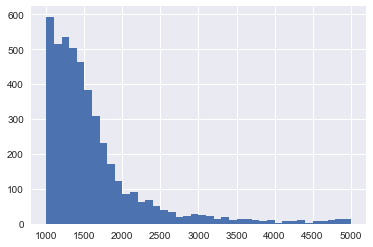

In [45]:
plt.hist(kaggle_token_distribution, bins=40, range=[1000, 5000])

(array([8.280e+02, 1.007e+03, 1.203e+03, 1.222e+03, 1.183e+03, 8.660e+02,
        7.580e+02, 7.260e+02, 5.840e+02, 5.900e+02, 5.930e+02, 5.150e+02,
        5.360e+02, 5.040e+02, 4.630e+02, 3.820e+02, 3.100e+02, 2.300e+02,
        1.720e+02, 1.230e+02, 8.600e+01, 9.000e+01, 6.100e+01, 6.900e+01,
        5.100e+01, 4.000e+01, 3.400e+01, 1.900e+01, 2.300e+01, 2.800e+01,
        2.600e+01, 2.200e+01, 1.500e+01, 1.900e+01, 1.200e+01, 1.400e+01,
        1.300e+01, 1.200e+01, 7.000e+00, 1.000e+01, 1.000e+00, 8.000e+00,
        9.000e+00, 1.200e+01, 1.000e+00, 9.000e+00, 7.000e+00, 1.000e+01,
        1.400e+01, 1.400e+01]),
 array([   0.,  100.,  200.,  300.,  400.,  500.,  600.,  700.,  800.,
         900., 1000., 1100., 1200., 1300., 1400., 1500., 1600., 1700.,
        1800., 1900., 2000., 2100., 2200., 2300., 2400., 2500., 2600.,
        2700., 2800., 2900., 3000., 3100., 3200., 3300., 3400., 3500.,
        3600., 3700., 3800., 3900., 4000., 4100., 4200., 4300., 4400.,
        4500., 4600.,

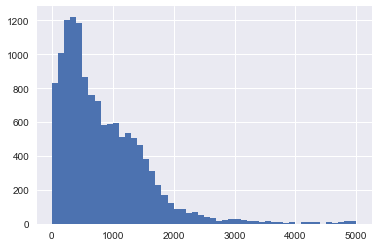

In [49]:
plt.hist(kaggle_token_distribution,bins=50, range=[0, 5000])

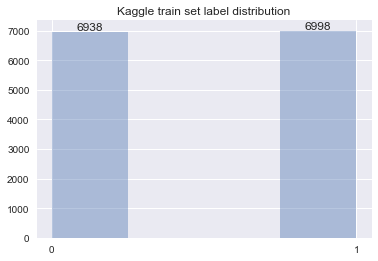

In [33]:
import matplotlib.ticker as ticker
ax = sns.distplot(kaggle_train_lab, bins=4, kde=False)
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.xaxis.set_major_formatter(ticker.ScalarFormatter())
# Iterate through the list of axes' patches

for i,p in enumerate(ax.patches):
    if i==0 or i==3:
        ax.text(p.get_x() + p.get_width()/2., p.get_height()+2, '%d' % int(p.get_height()), 
                fontsize=12, ha='center', va='bottom')

plt.title("Kaggle train set label distribution")
plt.show()